# Linked Lists

***

## Contents

    1. Introduction
    2. The Concept
        1. Singly Linked Lists
        2. Doubly Linked Lists
        3. Circular Linked Lists
    3. Applications
    4. Python Implementations
    5. Useful Interview Problems w/ solutions
    6. Additional Resources



***

## Introduction

This post is a continuation of the series on Classic Data Structures and their Implementation in Python, but these posts are stand-alone, so feel free to just go through the ones you need to, although going through the previous ones will only help cement your understanding.<br> As before, this is intended for people who are familiar with Python's syntax and functionalities and want to know how these data structures work and applied in this language. If you are unfamiliar with any concepts used here, there will be links added to the Additional Resources section, feel free to refer to them before getting started.<br>
Today's Data structures are, Linked Lists and a couple of it's variants, namely Doubly and Circularly Linked Lists.<br>
Unlike other posts, this one will also have a few Problems based on the topic that are widely asked in interviews to judge the understanding of these concepts. I encourage you to attempt them and spend some time on them before moving on to the solutions.<br>
(You shall find a Jupyter Notebook containing all the code here in the link at the bottom of the last section.)<br>
Let's get Started!

***

## The Concept

There are a few problems with using arrays to store our data- 
- They are of a fixed size.(not python lists but, generally)
- More importantly,they are expensive for new insertions and deletions. (Both are O(n) time complexity, on average.)<br>
For these shortfalls, and more, we came up with another Data Structure called Linked Lists.<br>
A Linked List is nothing but a collection of Nodes that are chained together. Kind of like a train.<br>
Every Node is a seperate object that contains two things,
 1. It's desired content (any data type) and,
 2. A reference to the next element, which connects them.

The Linked List above is called a Singly Linked List since it links to just the next element.<br>
The first and last elements are called *HEAD* and *TAIL* respectively.<br>
Each element starting at *HEAD* links to the next, and so on till we reach the *TAIL*. And what is the *TAIL* linked to? Well, nothing! or "None" in python context.<br>
That is the crux of it. Think of it as a train, starting at the engine (*HEAD*) and going all the way to the last box.(*TAIL*) But for now, you can only travel in one direction, from first to last, because that's how the links are.<br>
As you can imagine, if we want to add another Node at the end of the list, we need to go through the whole list, till the end and then add our new element. Pretty tiring.<br> But what if you could start at the end, and also be able to go backwards? That would make it very easy to access the elements near the end both for insertion and deletion.<br>
That's where a Doubly Linked List comes in. It is the same as A Singly Linked List, but with one difference. Our Node, which had a link to only the next element, now also has a link to the previous element.<br> So now we can go both ways, starting at either end! Very handy.
<br> There is yet another kind if Linked List. Take your Singly Linked List, and make your last Node(*TAIL*) point back to the first(*HEAD*).<br>What kind of shape do you think that would give us? A Circle. Hence we have a Circular Linked List. <br>
The image below should make all of this very clear.

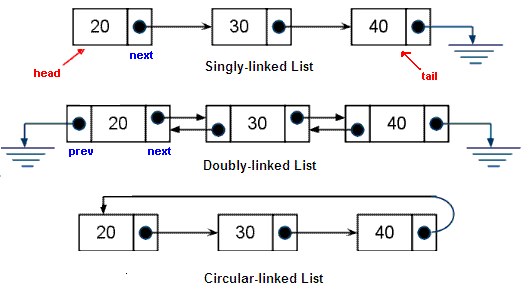

A few Pros and Cons of Linked Lists- 

 **Pros**

* Linked Lists have constant-time insertions and deletions in any position, in comparison, arrays require O(n) time to do the same thing.

* Linked lists can continue to expand without having to specify their size ahead of time.

**Cons**

* To access an element in a linked list, you need to take O(k) time to go from the head of the list to the kth element. In contrast, arrays have constant time operations to access elements in an array.

***

## Applications

A few Theoretical applications- 
- Linked Lists can be used to implement Stacks , Queues.
- Linked Lists can also be used to implement Graphs. (Adjacency list representation of Graph).
- Implementing Hash Tables  :-   Each Bucket of the hash table can itself be a linked list. (Open chain hashing). We will look at Hash Tables in a later post in the series.

Some applications you see and experience- 

- Undo functionality in Photoshop or Word . Linked list of states.
- Forward and backward navigation between webpages or apps.(Doubly Linked List)

Applications that run in the background but are of the utmost 
importance- 

- Linked lists are useful for dynamic memory allocation.
- Circular linked list is used in our Computers, where multiple applications are running.
- All the running applications are kept in a circular linked list and the OS gives a fixed time slot to all for running. The Operating System keeps on iterating over the linked list until all the applications are completed.


***

## Python Implementations

Since all the above Linked Lists are basically a collection of nodes, our main construction will be a Node Class with the following-
- the content (value)
- the reference to the next element (next)

We will also add a reference to the previous element, which will be used for the Doubly Linked List, but NOT for the Singly and Circularly Linked List.<br>We are adding it to the Node class so that we can use the same Node Class to create all our Linked Lists.

In [1]:
class Node(object):
    def __init__(self,value): #initializing with a value as an argument
        self.value = value
        self.next = None # defaults to None, till it is assigned
        self.prev = None #for doubly linking

### Singly Linked List

Now let us create our singly Linked List.<br>
We simply-
- Create a bunch of nodes by passing intended value in *Node()*
- Link the nodes to the next like so -  a.next = b 

In [2]:
a=Node(1)
b=Node(2)
c=Node(3)
a.next=b
b.next=c

Time to Test it out - 

In [5]:
print("Value of A- ",a.value)
print("A is pointing to- ",a.next)
print("Value of b- ",b.value)
print("B is pointing to- ",b.next)
print("Value of b.next- ",b.next.value)
print("C is pointing to- ",c.next)

Value of A-  1
A is pointing to-  <__main__.Node object at 0xb3d56c10>
Value of b-  2
B is pointing to-  <__main__.Node object at 0xb3d56d30>
Value of b.next-  3
C is pointing to-  None


Note - a.next points to the next Node Object, i.e. B. <br>In order to see the value we need to call either "b.value" or equivalently "a.next.value".

### Doubly linked list

To create our DLL, in addition to a singly linked list, we add
- A ***header*** Node at the beg. of the list,
- A  ***trailer*** Node at the end of the list.
- These dummy nodes are called ***sentinels***
- Every insertion takes place between two existing nodes.
- For first one, new Node is inserted b/w *header* and *trailer*.

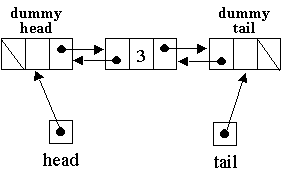

In [10]:
# modified Node class to also include a prev. pointer.
header = Node(None)
x = Node(1)
y = Node(2)
z = Node(3)
trailer = Node(None)
header.next =  x
x.next = y
           # X's previous links back to None by default
y.next = z
y.prev = x #Y's previous links back to X
z.prev = y # Z's previous links back to y
z.next = trailer # Z's next links to trailer
trailer.prev = z

Let us test it out - 

In [11]:
print("Value of x- ",x.value)
print("X's next node is - ",x.next)
print("Value of y- ",y.value)
print("Y's next node is - ",y.next)
print("Value of y's next node is - ",y.next.value)
print("Value of y's previous node is.- ",y.prev.value)
print("z's next node is - ",z.next, " (trailer)") 

Value of x-  1
X's next node is -  <__main__.Node object at 0xaf992750>
Value of y-  2
Y's next node is -  <__main__.Node object at 0xaf992af0>
Value of y's next node is -  3
Value of y's previous node is.-  1
z's next node is -  <__main__.Node object at 0xaf992ad0>  (trailer)


### Circular Linked List

For a Circular Linked List, simply link the last Node's ".next" to the first Node like so -  

In [12]:
k=Node(4)
l=Node(5)
m=Node(6)
            # creating the cycle -
k.next = l
l.next = m
m.next = k
print("value of k is - ",k.value)
print("value of m is - ",m.value)
print("value of m's next node is - ", m.next.value)
print(k==m.next) # boolean for checking if "k" and m.next are the same.

value of k is -  4
value of m is -  6
value of m's next node is -  4
True


### Operations

As far as operations on these linked lists go, the main ones are-
- Insertion of Nodes
- Deletion of Nodes
- Traversal of the Linked List

You have hopefully understood how these Linked Lists work, So i I will leave the implementation of these operations for you to attempt. Doing this will solidify what you have learnt and as you play around with it, you will intuitively understand the inner workings, therefore I highly recommend you to do them. Without Googling Before you spend some time on it, please. <br>

A few Notes to help with the above- 
- Visualise, or better yet, draw out your Linked List first.
- Keep in mind what links, previous and/or next, you need to make, and more importantly **break**.
- Before you break a link, make sure there is another link that leads to it, lest you lose access to the node.
- This process will be easier if you draw out what the LL looks like now, how you want it to look at the end, and how you will manipulate the links.

I will leave links to a good resource for them in the end, but **ATTEMPT THEM YOURSELF FIRST!**

***

## Interview Problems

These are a couple problems that are frequently asked in technical interviews and attempting yourself them will give you a good feel of the topic and confidence and clarity over what you know and what you don't. 

#### SLL reversal 
- write a function to reverse a LL in place. 
- input head, 
- output- new head.

#### Solution

Since we want to do this in place we want to make the funciton operate in O(1) space, meaning we don't want to create a new list, so we will simply use the current nodes! Time wise, we can perform the reversal in O(n) time.

We can reverse the list by changing the next pointer of each node. Each node's next pointer should point to the previous node.

In one pass from head to tail of our input list, we will point each node's next pointer to the previous element.

Make sure to copy current.next_node into next_node **before** setting current.next to previous. 

In [13]:
def reverse(head):
    # Set up current,previous, and next nodes
    current = head
    previous = None
    nextnode = None
    # until we have gone through to the end of the list
    while current:    
        # Make sure to copy the current nodes next node to a variable nextnode
        # Before overwriting as the previous node for reversal
        nextnode = current.next
        # Reverse the pointer ot the nextnode
        current.next = previous
        # Go one forward in the list
        previous = current
        current = nextnode
    return previous

In [14]:
a = Node(1)
b = Node(2)
c = Node(3)
d = Node(4)
a.next = b
b.next = c
c.next = d

In [15]:
print(d.next.value)
print(c.next.value)
print(b.next.value)
print(a.next.value) # should give an error


AttributeError: 'NoneType' object has no attribute 'value'

#### LL Nth to last node
- write a function that takes a head node and an int value "n" and returns *nth* to last node in the linked list.

#### Solution

In [16]:
def nth_last(a=Node,n=int):
    traversed = [] #maintain a list of traversed nodes
    while a: #to traverse till end
        traversed.append(a) # add to traversed list
        a = a.next
    return traversed[-n] # return Nth last list element (negative indexing used )

In [17]:
a = Node(1)
b = Node(2)
c = Node(3)
d = Node(4)
e = Node(5)
a.next = b
b.next = c
c.next = d
d.next = e

In [18]:
nth_last(a,2).value

4

***

## Additional Resources

1.  [Classes and Objects](https://www.w3schools.com/python/python_classes.asp)
2. [Lists](https://www.w3schools.com/python/python_lists.asp)
3. A great resource to learn more about Linked Lists, various problems and operations on it, and other implementations - [Further Linked Lists](https://www.geeksforgeeks.org/data-structures/linked-list/#quick)